In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import cv2

In [2]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'Train'



In [3]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('Train/*')
folders

['Train\\thick rope damage', 'Train\\thin rope damage']

In [7]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Training Generator
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 232 images belonging to 2 classes.


In [12]:
# Testing Generator
test_set = test_datagen.flow_from_directory('Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 232 images belonging to 2 classes.


In [13]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_19832\2655456400.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
8/8 [==============================] - 13s 1s/step - loss: 7.3161 - accuracy: 0.5647 - val_loss: 2.0828 - val_accuracy: 0.6724
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 2.5754 - accuracy: 0.7328 - val_loss: 1.3976 - val_accuracy: 0.8491
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 1.3192 - accuracy: 0.8147 - val_loss: 1.4364 - val_accuracy: 0.8578
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 1.6809 - accuracy: 0.8233 - val_loss: 0.9345 - val_accuracy: 0.8190
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.7985 - accuracy: 0.8664 - val_loss: 0.3655 - val_accuracy: 0.8922
Epoch 6/50
8/8 [==============================] - 10s 1s/step - loss: 0.4207 - accuracy: 0.9095 - val_loss: 0.5901 - val_accuracy: 0.9009
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.6885 - accuracy: 0.8491 - val_loss: 0.5306 - val_accuracy: 0.9009
Epoch 8/50
8/8 [=======================

40/40 [==============================] - 49s 1s/step - loss: 0.3557 - accuracy: 0.9778 - val_loss: 0.2898 - val_accuracy: 0.9817
Epoch 174/200
40/40 [==============================] - 49s 1s/step - loss: 0.1709 - accuracy: 0.9881 - val_loss: 0.2280 - val_accuracy: 0.9833
Epoch 175/200
40/40 [==============================] - 51s 1s/step - loss: 0.3141 - accuracy: 0.9746 - val_loss: 0.5144 - val_accuracy: 0.9603
Epoch 176/200
40/40 [==============================] - 50s 1s/step - loss: 0.2656 - accuracy: 0.9849 - val_loss: 0.1109 - val_accuracy: 0.9881
Epoch 177/200
40/40 [==============================] - 49s 1s/step - loss: 0.1308 - accuracy: 0.9897 - val_loss: 0.1915 - val_accuracy: 0.9857
Epoch 178/200
40/40 [==============================] - 51s 1s/step - loss: 0.3501 - accuracy: 0.9857 - val_loss: 0.1854 - val_accuracy: 0.9802
Epoch 179/200
40/40 [==============================] - 51s 1s/step - loss: 0.1710 - accuracy: 0.9881 - val_loss: 0.1379 - val_accuracy: 0.9921
Epoch 180/200

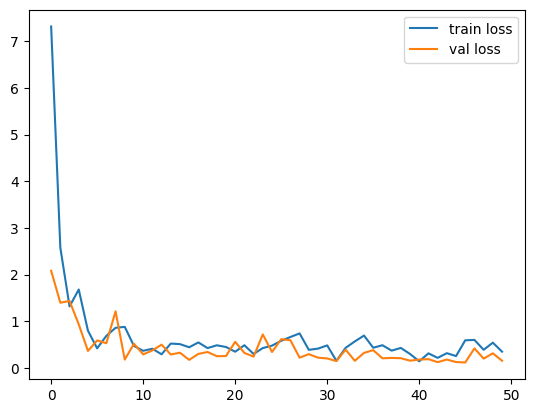

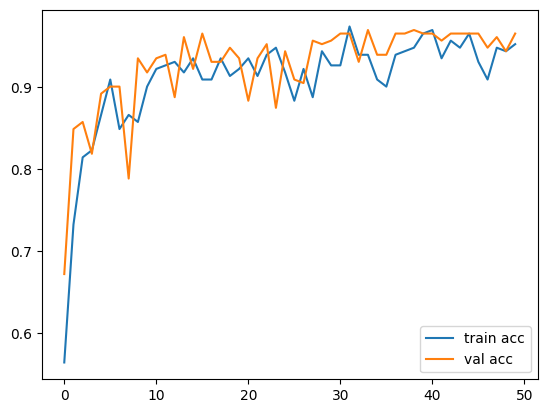

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
y_pred = model.predict(test_set)
y_pred

8/8 [==============================] - 5s 508ms/step


array([[2.57256849e-14, 1.00000000e+00],
       [9.99970436e-01, 2.95917289e-05],
       [1.00000000e+00, 4.99007329e-11],
       [9.99996901e-01, 3.13136070e-06],
       [9.99782264e-01, 2.17753608e-04],
       [9.99997020e-01, 2.92311188e-06],
       [1.00000000e+00, 5.33376152e-08],
       [1.00000000e+00, 1.76449948e-08],
       [1.84639942e-11, 1.00000000e+00],
       [5.57810490e-05, 9.99944210e-01],
       [1.00000000e+00, 5.37328582e-09],
       [1.00000000e+00, 1.32839312e-11],
       [5.61950719e-06, 9.99994397e-01],
       [8.29569757e-13, 1.00000000e+00],
       [1.65145427e-01, 8.34854603e-01],
       [9.99816835e-01, 1.83168246e-04],
       [9.91796494e-01, 8.20346083e-03],
       [5.92461735e-14, 1.00000000e+00],
       [3.33321979e-04, 9.99666691e-01],
       [3.11776103e-06, 9.99996901e-01],
       [9.99996901e-01, 3.06865763e-06],
       [1.00000000e+00, 1.90697569e-09],
       [1.93115801e-10, 1.00000000e+00],
       [1.80679857e-15, 1.00000000e+00],
       [1.180225

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)